<a href="https://colab.research.google.com/github/GoAshim/Convolutional-Neural-Network-with-TensorFlow/blob/main/02_Multiclass_Classification_in_CNN_with_Tensorflow_Predict_Image_in_CIFAR10_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiclass Classification in Convolutional Neural Network (CNN) using TensorFlow & Keras
In this project we will build CNN Deep Learning model and train it with pictures of different types of objects in the tensorflow CIFAR10 dataset so that the model will be able to predict the correct type from a new image.

## Step 1 - Import necessary libraries

In [50]:
# For data processing
import numpy as np
import random as rnd
import matplotlib.pyplot as plt

# For Convolutional Neural Network (CNN)
import tensorflow as tf
from tensorflow import keras
from keras import datasets
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, Rescaling, BatchNormalization

# Model Evaluation
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score
import seaborn as sns

## Step 2 - Import Data
We will get the images for this exercise from the CIFAR10 dataset which is publicly available in keras datasets library. This dataset contains pictures of multiple objects and is already split between training and test datasets to be used in the deep learning model.

In [51]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

## Step 3 - Exploratory Data Analysis
In this step we will analyze the data and it's features to get a better understanding before we can use in the subsequent CNN model.

In [52]:
# Check the shape of training and test data
print("Shape of the training data: ", X_train.shape)
print("Shape of the test data: ", X_test.shape)
print("Shape of the training labels: ", y_train.shape)
print("Shape of the test labels: ", y_test.shape)

Shape of the training data:  (50000, 32, 32, 3)
Shape of the test data:  (10000, 32, 32, 3)
Shape of the training labels:  (50000, 1)
Shape of the test labels:  (10000, 1)


array([[[125, 125, 116],
        [110, 101,  91],
        [102,  90,  83],
        ...,
        [202, 207, 214],
        [200, 205, 212],
        [202, 208, 214]],

       [[142, 146, 142],
        [146, 144, 139],
        [176, 172, 170],
        ...,
        [195, 201, 205],
        [198, 205, 209],
        [204, 211, 215]],

       [[180, 185, 183],
        [143, 146, 146],
        [156, 157, 157],
        ...,
        [122, 111, 113],
        [139, 128, 131],
        [158, 147, 150]],

       ...,

       [[104,  82,  41],
        [101,  80,  39],
        [101,  81,  38],
        ...,
        [126, 103,  67],
        [126, 103,  69],
        [125, 101,  68]],

       [[104,  81,  40],
        [105,  84,  41],
        [109,  88,  43],
        ...,
        [138, 113,  78],
        [137, 113,  80],
        [137, 112,  81]],

       [[105,  83,  42],
        [108,  87,  45],
        [115,  94,  50],
        ...,
        [143, 117,  82],
        [143, 116,  84],
        [144, 116,  86]]], dtype=uint8)
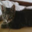

In [53]:
# Print a random item from the training data
X_train[9]

In [54]:
# Print a random item from the training label
y_train[9]

array([3], dtype=uint8)

In [55]:
# Get the maximum and minimum value of the training and test labels
print("Maximum value of the training label: ", y_train.max())
print("Minimum value of the training label: ", y_train.min())
print("Maximum value of the test label: ", y_test.max())
print("Minimum value of the test label: ", y_test.min())

Maximum value of the training label:  9
Minimum value of the training label:  0
Maximum value of the test label:  9
Minimum value of the test label:  0


In [56]:
# Create an array representing all 10 labels of the images in the dataset
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

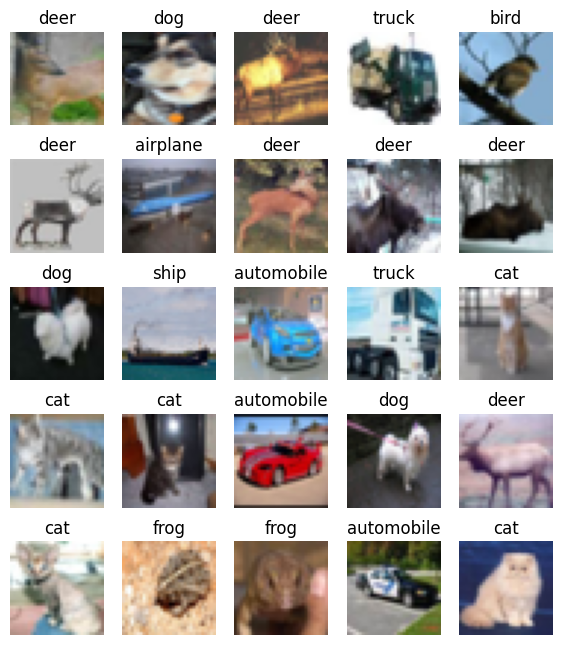

In [57]:
# Plot 25 random images from the training data
plt.figure(figsize=(7, 8))

for i in range(25):
  # Generate a random number between 0 and the length of the training data, which is 50000
  ind = rnd.choice(range(len(X_train)))
  plt.subplot(5, 5, i+1)
  plt.imshow(X_train[ind])
  plt.title(labels[y_train[ind, 0]])
  plt.axis('off')

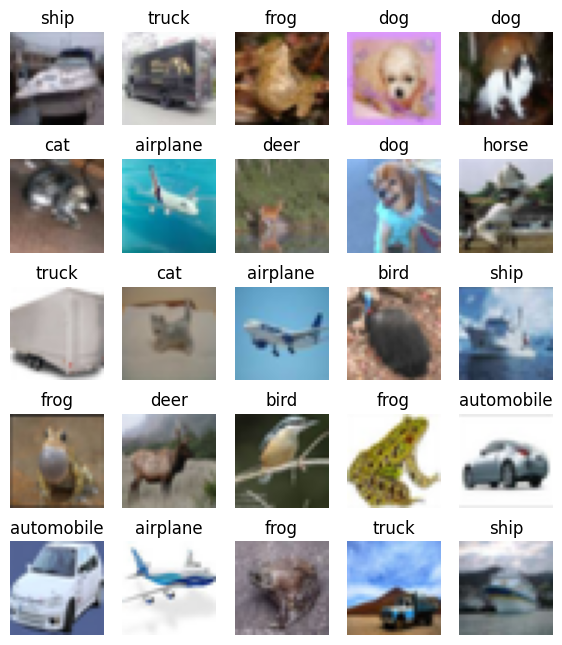

In [58]:
# Plot 25 random images from the test data
plt.figure(figsize=(7, 8))

for i in range(25):
  ind = rnd.choice(range(len(X_test)))
  plt.subplot(5, 5, i+1)
  plt.imshow(X_test[ind])
  plt.title(labels[y_test[ind, 0]])
  plt.axis('off')

In [59]:
# Normalize the training and test data so that the number of each pixel will be between 0 and 1 instead of 0 and 255
X_train = X_train / 255
X_test = X_test / 255

In [60]:
# Print the same item from the training data as we did before to see the normalization
X_train[9]

array([[[0.49019608, 0.49019608, 0.45490196],
        [0.43137255, 0.39607843, 0.35686275],
        [0.4       , 0.35294118, 0.3254902 ],
        ...,
        [0.79215686, 0.81176471, 0.83921569],
        [0.78431373, 0.80392157, 0.83137255],
        [0.79215686, 0.81568627, 0.83921569]],

       [[0.55686275, 0.57254902, 0.55686275],
        [0.57254902, 0.56470588, 0.54509804],
        [0.69019608, 0.6745098 , 0.66666667],
        ...,
        [0.76470588, 0.78823529, 0.80392157],
        [0.77647059, 0.80392157, 0.81960784],
        [0.8       , 0.82745098, 0.84313725]],

       [[0.70588235, 0.7254902 , 0.71764706],
        [0.56078431, 0.57254902, 0.57254902],
        [0.61176471, 0.61568627, 0.61568627],
        ...,
        [0.47843137, 0.43529412, 0.44313725],
        [0.54509804, 0.50196078, 0.51372549],
        [0.61960784, 0.57647059, 0.58823529]],

       ...,

       [[0.40784314, 0.32156863, 0.16078431],
        [0.39607843, 0.31372549, 0.15294118],
        [0.39607843, 0

## Step 4 - Build the CNN Model
In this step we will build and compile CNN model.

In [61]:
# Build the CNN model
model_01 = Sequential()

# Add 3 convolution and max pooling layers to the model
model_01.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(32,32,3)))
model_01.add(MaxPooling2D(pool_size=(2, 2)))
model_01.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model_01.add(MaxPooling2D(pool_size=(2, 2)))
model_01.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
model_01.add(MaxPooling2D(pool_size=(2, 2)))

# Add a flatten layer and one hidden and one output ANN layer
model_01.add(Flatten())
model_01.add(Dense(1024, activation='relu'))
model_01.add(Dense(10, activation='softmax'))

In [62]:
# Compile the model
model_01.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## Step 5 - Run the CNN Model
In this step we will fit the CNN model on the training data and use the model to see how it performs on the test data.

In [64]:
# Run the model on the training and test data
hist_01 = model_01.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

In [ ]:
# Check the model summary
model_01.summary()

In [ ]:
# Plot the accuracy of model on training and test data
plt.plot(hist_01.history['accuracy'], color='blue', label='Training Accuracy')
plt.plot(hist_01.history['val_accuracy'], color='red', label='Test Accuracy')
plt.legend()
plt.show();

In [ ]:
# Plot the loss of model on training and test data
plt.plot(hist_01.history['loss'], color='blue', label='Training Accuracy')
plt.plot(hist_01.history['val_loss'], color='red', label='Test Accuracy')
plt.legend()
plt.show();

### Observation
From the first chart above, we see that the training accuracy is continuously increasing by every epoch and at the end of the 10th epoch, it's almost reached 100%, however the test accuracy reached about 75% at the end of the third epoch and stayed flat thereafter.

Similarly, from the second chart above, we see that the training loss is continuously decreasing by every epoch and at the end of the 10th epoch, it's reached close to 0%, however the test loss on the other hand kept on increasing.

The large gap in both accuracy and loss between the training and test data is due to **overfitting** of our model on the training data, which we will need to correct.

## Step 6 - Rebuild the CNN Model
In this step we will rebuild the CNN model we built earlier above with certain changes to address the overfitting problem.

In [ ]:
model_02 = Sequential()

# Add convolution, batch normalization and max pooling layers to the model
model_02.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(32,32,3)))
model_02.add(BatchNormalization())
model_02.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'))
model_02.add(BatchNormalization())
model_02.add(MaxPooling2D(pool_size=(2, 2)))

model_02.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model_02.add(BatchNormalization())
model_02.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model_02.add(BatchNormalization())
model_02.add(MaxPooling2D(pool_size=(2, 2)))

model_02.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
model_02.add(BatchNormalization())
model_02.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
model_02.add(BatchNormalization())
model_02.add(MaxPooling2D(pool_size=(2, 2)))

# Add one hidden and one output ANN layer with 20% dropout
model_02.add(Flatten())
model_02.add(Dropout(0.2))
model_02.add(Dense(1024, activation='relu'))
model_02.add(Dropout(0.2))
model_02.add(Dense(10, activation='softmax'))

In [ ]:
# Compile the model
model_02.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## Step 7 - Rerun the CNN Model
In this step we will fit the updated CNN model on the training data and use the model to see how it performs on the test data.

In [ ]:
hist_02 = model_02.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

In [ ]:
# Plot the accuracy of model on training and test data
plt.plot(hist_02.history['accuracy'], color='blue', label='Training Accuracy')
plt.plot(hist_02.history['val_accuracy'], color='red', label='Test Accuracy')
plt.legend()
plt.show();

In [ ]:
# Plot the loss of model on training and test data
plt.plot(hist_02.history['loss'], color='blue', label='Training Accuracy')
plt.plot(hist_02.history['val_loss'], color='red', label='Test Accuracy')
plt.legend()
plt.show();

### Observation
From the two charts above we can see that the gap of loss as well as accuracy between the training and test runs have decreased in the second model with respect to that of the first model. That confirms that the introduction of the Batch Normalization and Dropout layers have helped to address the overfitting problem to some extent.

## Step 8 - Evaluate Multi-class Classification Models
In this steps we will evaluate various performance attributes of the CNN multi-class classification model we used in the previous experiemnt.

## Step 9 - Test the CNN Model
In this step we will test the updated CNN model with a new picture of dog and cat.
Refer to ANN #5 and #6